O caixeiro com gasolina infinita (e sem conciência ambiental)
========================================



## Introdução



 O problema do caixeiro viajante com gasolina infinita é uma variação do problema de NP-difícil do caixeiro viajante, só que nesse caso queremos encontrar o maior caminho possível para o caixeiro viajante passar. Ou seja, transformamos um problema de minimização em um problema de maximização. 

## Objetivo



Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.


## Considerações do experimento

Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import random
from itertools import permutations
import matplotlib.pyplot as plt
import networkx 

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_cv 
from funcoes import funcao_objetivo_pop_cv 
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 7
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [3]:
# Funções locais
def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = min(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness  

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 2', 'Cidade 5', 'Cidade 0', 'Cidade 6', 'Cidade 1', 'Cidade 4'] com distância: 5.188196871089321

Melhor individuo obtido por busca exaustiva:
('Cidade 2', 'Cidade 1', 'Cidade 6', 'Cidade 3', 'Cidade 4', 'Cidade 0', 'Cidade 5') com distância: 5.7022894902212755


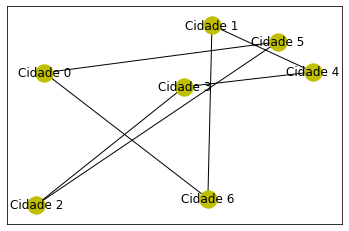

In [10]:
#Plotar o grafo

g = networkx.Graph()
for i in list(CIDADES.keys()): #Chama o dicionário
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1: 
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1]) #ligar vértice entre as arestas adjacentes
    k+=1
vertices = CIDADES.keys()

#chamar o grafo
pos = networkx.spring_layout(g,pos=CIDADES, fixed = vertices)
networkx.draw_networkx(g,pos,node_color = 'y')


### Discussão

Esse experimento se difere do experimento do caixeiro viajante normal apenas no fato de ser um problema de maximização, ou seja, agora queremos encontrar o maior caminho possível, não mais o menor. Com isso, temos duas mudanças maiores com relação ao notebook e as funções, a função de seleção tem que ser uma função de maximização, então troquei a função de seleção por torneio mínimo por seleção por torneio máximo. Nessa função, há uma comparação ("torneio") entre os indivíduos e aquele com maior fitness será escolhido para a próxima geração. Além disso, no notebook alterei o "melhor_fitness_já_visto" para ser iniciado com "-inf" para ser substituido pelos indivíduos que tenham um fitness maior. E apenas com essas modificações podemos transformar o problema do caixeiro viajante mínimo em um problema de maximização.

Utilizamos também o algoritmo de busca exaustiva para testar todas as possibilidades e encontrar o valor correto para fins comparativos. 

Utilizamos também o algoritmo de busca exaustiva, utilizado anteriormente nesse repositório, para testar todas as possibilidades e encontrar o valor correto para fins comparativos. 
O grafo plotado, através da biblioteca networks, mostra o maior caminho realizado pelo caixeiro viajante para cada vez que rodarmos o algoritmo.

## Conclusão



Com esse notebook resolvemos o problema do caixeiro viajante com gasolina infinita utilizando algoritmos genéticos. A resolução é muito similar a do caixeiro viajante com algumas modificações, sendo a maior delas alterar os algoritmos genéticos para considerar os indivíduos com o maior fitness na função de seleção.  

Olhando para os resultados do algoritmo genéticos e da busca exaustivo, vemos uma diferença entre os valores, mas podemos considerar que o algoritmo genético convergiu bem para esse problema. 

## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.



cruzamento_ordenado_lt()
gerar um index aleatrorio e para ele gerar um valor aleatório de gene. se o gene gerado for maior que o gene anterior = outro gene menos a dif dos dois. caso contrario ele soma a diferença

In [8]:

# Definir lista index com enumerate

index_aleatorio = random.choice(lista_index)
gene_novo = gene_lt() # Qual vai ser o valor máximo?
gene_anterior = individuo[index_aleatorio] 

individuo[index_aleatorio] = gene_novo

# Fazer alguma coisa aqui para testar se todos os genes terão mais que 5 gramas

while True:
    
    # Deve ser um index que seja diferente de index aleatorio
    # Dá p simplesmente fazer um pop da lista_index

    index_aleatorio_2 =
    
    if gene_novo >= gene_anterior:
        individuo[index_aleatorio_2] -= gene_novo-gene_anterior
    else:
        individuo[index_aleatorio_2] += gene_anterior-gene_novo

SyntaxError: invalid syntax (Temp/ipykernel_9108/3325311149.py, line 16)